In [1]:
 import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import entropy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Research/alpha_analysis/"

In [4]:
name="_50_300_10runs_entropy"

In [5]:
# mu1 = np.array([3,3,3,3,0])
# sigma1 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu2 = np.array([4,4,4,4,0])
# sigma2 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu3 = np.array([10,5,5,10,0])
# sigma3 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu4 = np.array([-10,-10,-10,-10,0])
# sigma4 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu5 = np.array([-21,4,4,-21,0])
# sigma5 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu6 = np.array([-10,18,18,-10,0])
# sigma6 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu7 = np.array([4,20,4,20,0])
# sigma7 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu8 = np.array([4,-20,-20,4,0])
# sigma8 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu9 = np.array([20,20,20,20,0])
# sigma9 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu10 = np.array([20,-10,-10,20,0])
# sigma10 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])



# sample1 = np.random.multivariate_normal(mean=mu1,cov= sigma1,size=500)
# sample2 = np.random.multivariate_normal(mean=mu2,cov= sigma2,size=500)
# sample3 = np.random.multivariate_normal(mean=mu3,cov= sigma3,size=500)
# sample4 = np.random.multivariate_normal(mean=mu4,cov= sigma4,size=500)
# sample5 = np.random.multivariate_normal(mean=mu5,cov= sigma5,size=500)
# sample6 = np.random.multivariate_normal(mean=mu6,cov= sigma6,size=500)
# sample7 = np.random.multivariate_normal(mean=mu7,cov= sigma7,size=500)
# sample8 = np.random.multivariate_normal(mean=mu8,cov= sigma8,size=500)
# sample9 = np.random.multivariate_normal(mean=mu9,cov= sigma9,size=500)
# sample10 = np.random.multivariate_normal(mean=mu10,cov= sigma10,size=500)


In [6]:
# X = np.concatenate((sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10),axis=0)
# Y = np.concatenate((np.zeros((500,1)),np.ones((500,1)),2*np.ones((500,1)),3*np.ones((500,1)),4*np.ones((500,1)),
#                     5*np.ones((500,1)),6*np.ones((500,1)),7*np.ones((500,1)),8*np.ones((500,1)),9*np.ones((500,1))),axis=0).astype(int)
# print(X.shape,Y.shape)
# # plt.scatter(sample1[:,0],sample1[:,1],label="class_0")
# # plt.scatter(sample2[:,0],sample2[:,1],label="class_1")
# # plt.scatter(sample3[:,0],sample3[:,1],label="class_2")
# # plt.scatter(sample4[:,0],sample4[:,1],label="class_3")
# # plt.scatter(sample5[:,0],sample5[:,1],label="class_4")
# # plt.scatter(sample6[:,0],sample6[:,1],label="class_5")
# # plt.scatter(sample7[:,0],sample7[:,1],label="class_6")
# # plt.scatter(sample8[:,0],sample8[:,1],label="class_7")
# # plt.scatter(sample9[:,0],sample9[:,1],label="class_8")
# # plt.scatter(sample10[:,0],sample10[:,1],label="class_9")
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [7]:
# class SyntheticDataset(Dataset):
#   """MosaicDataset dataset."""

#   def __init__(self, x, y):
#     """
#       Args:
#         csv_file (string): Path to the csv file with annotations.
#         root_dir (string): Directory with all the images.
#         transform (callable, optional): Optional transform to be applied
#             on a sample.
#     """
#     self.x = x
#     self.y = y
#     #self.fore_idx = fore_idx
    
#   def __len__(self):
#     return len(self.y)

#   def __getitem__(self, idx):
#     return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [8]:
# trainset = SyntheticDataset(X,Y)


# # testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [9]:
# classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

# foreground_classes = {'zero','one','two'}
# fg_used = '012'
# fg1, fg2, fg3 = 0,1,2


# all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
# background_classes = all_classes - foreground_classes
# background_classes

In [10]:
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

In [11]:
# dataiter = iter(trainloader)
# background_data=[]
# background_label=[]
# foreground_data=[]
# foreground_label=[]
# batch_size=100

# for i in range(50):
#   images, labels = dataiter.next()
#   for j in range(batch_size):
#     if(classes[labels[j]] in background_classes):
#       img = images[j].tolist()
#       background_data.append(img)
#       background_label.append(labels[j])
#     else:
#       img = images[j].tolist()
#       foreground_data.append(img)
#       foreground_label.append(labels[j])
            
# foreground_data = torch.tensor(foreground_data)
# foreground_label = torch.tensor(foreground_label)
# background_data = torch.tensor(background_data)
# background_label = torch.tensor(background_label)

In [12]:
# def create_mosaic_img(bg_idx,fg_idx,fg): 
#   """
#   bg_idx : list of indexes of background_data[] to be used as background images in mosaic
#   fg_idx : index of image to be used as foreground image from foreground data
#   fg : at what position/index foreground image has to be stored out of 0-8
#   """
#   image_list=[]
#   j=0
#   for i in range(9):
#     if i != fg:
#       image_list.append(background_data[bg_idx[j]])
#       j+=1
#     else: 
#       image_list.append(foreground_data[fg_idx])
#       label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
#   #image_list = np.concatenate(image_list ,axis=0)
#   image_list = torch.stack(image_list) 
#   return image_list,label

In [13]:
# desired_num = 3000
# mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i)
#   bg_idx = np.random.randint(0,3500,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,1500)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   fore_idx.append(fg)
#   image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
#   mosaic_list_of_images.append(image_list)
#   mosaic_label.append(label)
#   list_set_labels.append(set_idx)

In [14]:
# def create_avg_image_from_mosaic_dataset(mosaic_dataset,labels,foreground_index,dataset_number):
#   """
#   mosaic_dataset : mosaic_dataset contains 9 images 32 x 32 each as 1 data point
#   labels : mosaic_dataset labels
#   foreground_index : contains list of indexes where foreground image is present so that using this we can take weighted average
#   dataset_number : will help us to tell what ratio of foreground image to be taken. for eg: if it is "j" then fg_image_ratio = j/9 , bg_image_ratio = (9-j)/8*9
#   """
#   avg_image_dataset = []
#   for i in range(len(mosaic_dataset)):
#     img = torch.zeros([5], dtype=torch.float64)
#     for j in range(9):
#       if j == foreground_index[i]:
#         img = img + mosaic_dataset[i][j]*dataset_number/9
#       else :
#         img = img + mosaic_dataset[i][j]*(9-dataset_number)/(8*9)
    
#     avg_image_dataset.append(img)
    
#   return torch.stack(avg_image_dataset) , torch.stack(labels) , foreground_index

In [15]:
class MosaicDataset1(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label,fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] , self.fore_idx[idx]

In [16]:
# data =  [{"mosaic_list":mosaic_list_of_images, "mosaic_label": mosaic_label, "fore_idx":fore_idx}]
# np.save("mosaic_data.npy",data)

In [17]:
data = np.load(path+"mosaic_data.npy",allow_pickle=True)

In [18]:
mosaic_list_of_images = data[0]["mosaic_list"]
mosaic_label = data[0]["mosaic_label"]
fore_idx = data[0]["fore_idx"]

In [19]:
batch = 250
msd = MosaicDataset1(mosaic_list_of_images, mosaic_label, fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

**Focus Net**

In [20]:
class Focus_deep(nn.Module):
    '''
       deep focus network averaged at zeroth layer
       input : elemental data
    '''
    def __init__(self,inputs,output,K,d):
        super(Focus_deep,self).__init__()
        self.inputs = inputs
        self.output = output
        self.K = K
        self.d  = d
        self.linear1 = nn.Linear(self.inputs,50)  #,self.output)
        self.linear2 = nn.Linear(50,self.output) 
    def forward(self,z):
        batch = z.shape[0]
        x = torch.zeros([batch,self.K],dtype=torch.float64)
        y = torch.zeros([batch,self.d], dtype=torch.float64)
        x,y = x.to("cuda"),y.to("cuda")
        for i in range(self.K):
            x[:,i] = self.helper(z[:,i] )[:,0]  # self.d*i:self.d*i+self.d
        
        log_x = F.log_softmax(x,dim=1)  # log alpha to calculate entropy
        x = F.softmax(x,dim=1)   # alphas

        x1 = x[:,0]
        for i in range(self.K):
            x1 = x[:,i]          
            y = y+torch.mul(x1[:,None],z[:,i])  # self.d*i:self.d*i+self.d
        return y , x,log_x 
    def helper(self,x):
      x = F.relu(self.linear1(x))
      x = self.linear2(x)
      return x


**Classification Net**

In [21]:
class Classification_deep(nn.Module):
    '''
       input : elemental data
       deep classification module data averaged at zeroth layer
    '''
    def __init__(self,inputs,output):
        super(Classification_deep,self).__init__()
        self.inputs = inputs
        self.output = output
        self.linear1 = nn.Linear(self.inputs,300)
        self.linear2 = nn.Linear(300,self.output)

    def forward(self,x):
      x = F.relu(self.linear1(x))
      x = self.linear2(x)
      return x    

In [22]:
criterion = nn.CrossEntropyLoss()
def my_cross_entropy(x, y,alpha,log_alpha,k):
    # log_prob = -1.0 * F.log_softmax(x, 1)
    # loss = log_prob.gather(1, y.unsqueeze(1))
    # loss = loss.mean()
    loss = criterion(x,y)
    
    #alpha = torch.clamp(alpha,min=1e-10)     
    
    b = -1.0* alpha * log_alpha
    b =  torch.mean(torch.sum(b,dim=1))
    closs = loss
    entropy = b 
    loss = (1-k)*loss + ((k)*b)
    return loss,closs,entropy

In [23]:
def calculate_attn_loss(dataloader,what,where,criter,k):
  what.eval()
  where.eval()
  r_loss = 0
  cc_loss = 0
  cc_entropy = 0
  alphas = []
  lbls = []
  pred = []
  fidices = []
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels,fidx = data
      lbls.append(labels)
      fidices.append(fidx)
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      avg,alpha,log_alpha = where(inputs)
      outputs = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      pred.append(predicted.cpu().numpy())
      alphas.append(alpha.cpu().numpy())

      #ent = np.sum(entropy(alpha.cpu().detach().numpy(), base=2, axis=1))/batch
      # mx,_ = torch.max(alpha,1)
      # entropy = np.mean(-np.log2(mx.cpu().detach().numpy()))
      # print("entropy of batch", entropy)

      #loss = (1-k)*criter(outputs, labels) + k*ent
      loss,closs,entropy = my_cross_entropy(outputs,labels,alpha,log_alpha,k)
      r_loss += loss.item()
      cc_loss += closs.item()
      cc_entropy += entropy.item()

  alphas = np.concatenate(alphas,axis=0)
  pred = np.concatenate(pred,axis=0)
  lbls = np.concatenate(lbls,axis=0)
  fidices = np.concatenate(fidices,axis=0)
  #print(alphas.shape,pred.shape,lbls.shape,fidices.shape) 
  analysis = analyse_data(alphas,lbls,pred,fidices)
  return r_loss/i,cc_loss/i,cc_entropy/i,analysis

In [24]:
def analyse_data(alphas,lbls,predicted,f_idx):
    '''
       analysis data is created here
    '''
    batch = len(predicted)
    amth,alth,ftpt,ffpt,ftpf,ffpf = 0,0,0,0,0,0
    for j in range (batch):
      focus = np.argmax(alphas[j])
      if(alphas[j][focus] >= 0.5):
        amth +=1
      else:
        alth +=1
      if(focus == f_idx[j] and predicted[j] == lbls[j]):
        ftpt += 1
      elif(focus != f_idx[j] and predicted[j] == lbls[j]):
        ffpt +=1
      elif(focus == f_idx[j] and predicted[j] != lbls[j]):
        ftpf +=1
      elif(focus != f_idx[j] and predicted[j] != lbls[j]):
        ffpf +=1
    #print(sum(predicted==lbls),ftpt+ffpt)
    return [ftpt,ffpt,ftpf,ffpf,amth,alth]

In [37]:
number_runs = 10
full_analysis =[]
FTPT_analysis = pd.DataFrame(columns = ["FTPT","FFPT", "FTPF","FFPF"])
k = 0.005
for n in range(number_runs):
  print("--"*40)
  
  # instantiate focus and classification Model
  torch.manual_seed(n)
  where = Focus_deep(5,1,9,5).double()
  torch.manual_seed(n)
  what = Classification_deep(5,3).double()
  where = where.to("cuda")
  what = what.to("cuda")



  # instantiate optimizer
  optimizer_where = optim.Adam(where.parameters(),lr =0.01)
  optimizer_what = optim.Adam(what.parameters(), lr=0.01)
  #criterion = nn.CrossEntropyLoss()
  acti = []
  analysis_data = []
  loss_curi = []
  epochs = 6000


  # calculate zeroth epoch loss and FTPT values
  running_loss ,_,_,anlys_data= calculate_attn_loss(train_loader,what,where,criterion,k)
  loss_curi.append(running_loss)
  analysis_data.append(anlys_data)

  print('epoch: [%d ] loss: %.3f' %(0,running_loss)) 

  # training starts 
  for epoch in range(epochs): # loop over the dataset multiple times
    ep_lossi = []
    running_loss = 0.0
    what.train()
    where.train()
    for i, data in enumerate(train_loader, 0):
      # get the inputs
      inputs, labels,_ = data
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")

      # zero the parameter gradients
      optimizer_where.zero_grad()
      optimizer_what.zero_grad()
      
      # forward + backward + optimize
      avg, alpha,log_alpha = where(inputs)
      outputs = what(avg)

      my_loss,_,_ = my_cross_entropy(outputs,labels,alpha,log_alpha,k)

      # print statistics
      running_loss += my_loss.item()
      my_loss.backward()
      optimizer_where.step()
      optimizer_what.step()
    #break
    running_loss,ccloss,ccentropy,anls_data = calculate_attn_loss(train_loader,what,where,criterion,k)
    analysis_data.append(anls_data)
    print('epoch: [%d] loss: %.3f celoss: %.3f entropy: %.3f' %(epoch + 1,running_loss,ccloss,ccentropy)) 
    loss_curi.append(running_loss)   #loss per epoch
    if running_loss<=0.001:
      break
  print('Finished Training run ' +str(n))
  #break
  analysis_data = np.array(analysis_data)
  FTPT_analysis.loc[n] = analysis_data[-1,:4]/30
  full_analysis.append((epoch, analysis_data))
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      images, labels,_ = data
      images = images.double()
      images, labels = images.to("cuda"), labels.to("cuda")
      avg, alpha,log_alpha = where(images)
      outputs  = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 3000 train images: %d %%' % (  100 * correct / total))
    

--------------------------------------------------------------------------------
epoch: [0 ] loss: 3.612
epoch: [1] loss: 2.312 celoss: 2.320 entropy: 0.656
epoch: [2] loss: 1.513 celoss: 1.518 entropy: 0.529
epoch: [3] loss: 1.289 celoss: 1.293 entropy: 0.447
epoch: [4] loss: 1.230 celoss: 1.233 entropy: 0.464
epoch: [5] loss: 1.285 celoss: 1.289 entropy: 0.459
epoch: [6] loss: 1.255 celoss: 1.259 entropy: 0.434
epoch: [7] loss: 1.242 celoss: 1.246 entropy: 0.425
epoch: [8] loss: 1.207 celoss: 1.211 entropy: 0.430
epoch: [9] loss: 1.193 celoss: 1.197 entropy: 0.428
epoch: [10] loss: 1.239 celoss: 1.243 entropy: 0.431
epoch: [11] loss: 1.237 celoss: 1.241 entropy: 0.441
epoch: [12] loss: 1.334 celoss: 1.338 entropy: 0.454
epoch: [13] loss: 1.260 celoss: 1.264 entropy: 0.468
epoch: [14] loss: 1.298 celoss: 1.302 entropy: 0.485
epoch: [15] loss: 1.221 celoss: 1.224 entropy: 0.514
epoch: [16] loss: 1.223 celoss: 1.226 entropy: 0.545
epoch: [17] loss: 1.352 celoss: 1.356 entropy: 0.601
epo

In [38]:
a,b= full_analysis[0]
print(a)

82


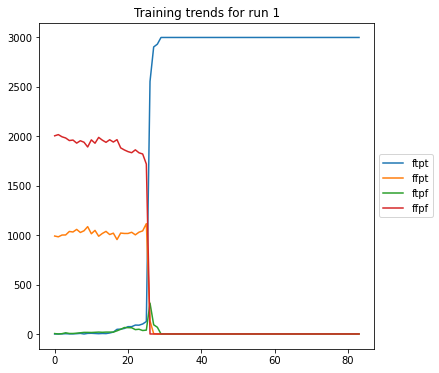

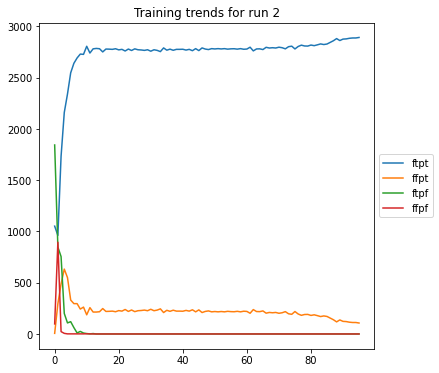

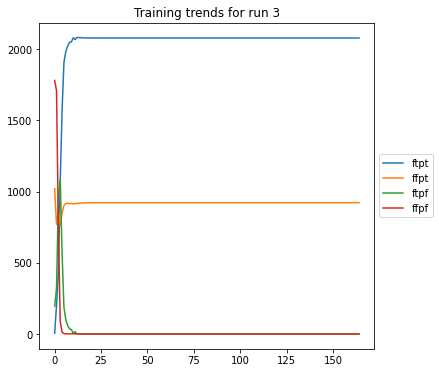

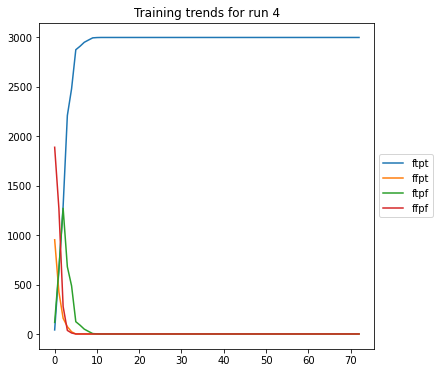

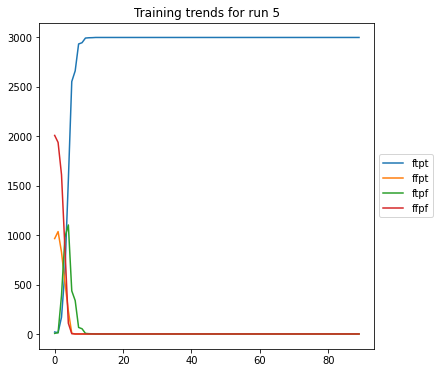

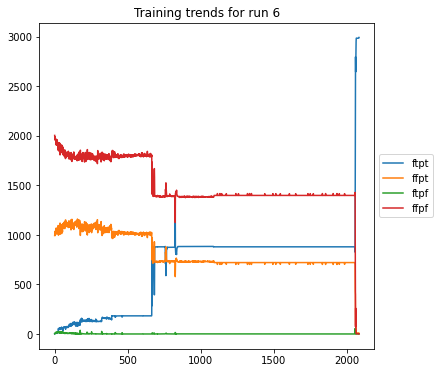

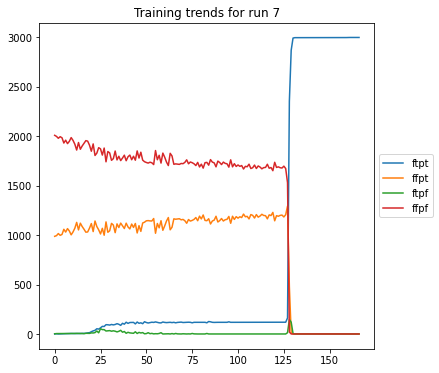

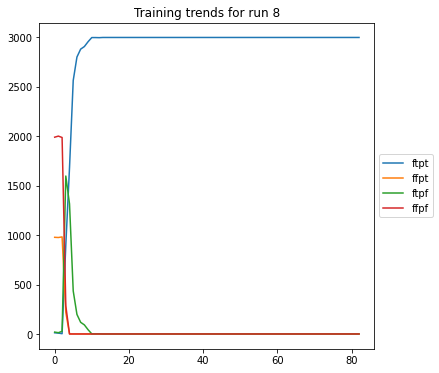

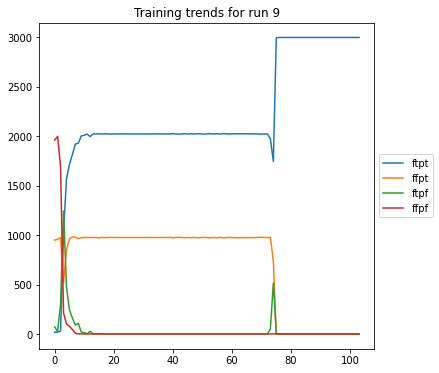

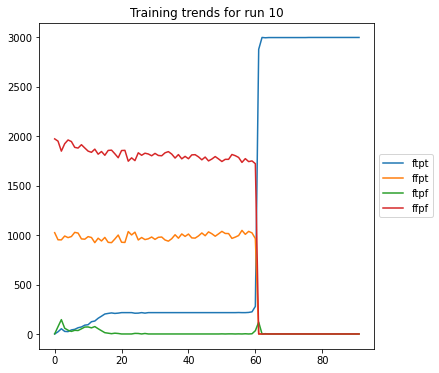

In [43]:
cnt=1
for epoch, analysis_data in full_analysis:
  analysis_data = np.array(analysis_data)
  # print("="*20+"run ",cnt,"="*20)
  
  plt.figure(figsize=(6,6))
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,0],label="ftpt")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,1],label="ffpt")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,2],label="ftpf")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,3],label="ffpf")

  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title("Training trends for run "+str(cnt))
  plt.savefig("/content/drive/MyDrive/Research/alpha_analysis/50_300/k01/"+"run"+str(cnt)+name+".png",bbox_inches="tight")
  plt.savefig("/content/drive/MyDrive/Research/alpha_analysis/50_300/k01/"+"run"+str(cnt)+name+".pdf",bbox_inches="tight")
  cnt+=1


In [44]:
np.mean(np.array(FTPT_analysis),axis=0) #array([83.61333333,  5.77      ,  0.        , 10.61666667])

array([96.55,  3.45,  0.  ,  0.  ])

In [45]:
FTPT_analysis.to_csv(path+"FTPT_analysis"+name+"_"+str(k)+".csv",index=False)

In [46]:
FTPT_analysis

,FTPT,FFPT,FTPF,FFPF
0,100.000000,0.000000,0.0,0.0
1,96.433333,3.566667,0.0,0.0
2,69.266667,30.733333,0.0,0.0
3,100.000000,0.000000,0.0,0.0
4,100.000000,0.000000,0.0,0.0
5,99.800000,0.200000,0.0,0.0
6,100.000000,0.000000,0.0,0.0
7,100.000000,0.000000,0.0,0.0
8,100.000000,0.000000,0.0,0.0
9,100.000000,0.000000,0.0,0.0
